# Group 13 - Yelp Review Analysis for Module 3

Group members:
- Jonquil Liao
- Yuhan Zhou
- Yike Wang

**It can be seen that the tops in bad reviews are likey to be:**

(1) slow service and drink; (2) temperature of steak (seems like thai food in this subset of data); (3) sides and ingredients; (4) place.

## 1. Import the data

In [100]:
import pandas as pd
review = pd.read_json('Data/review_city.json', lines=True)
business = pd.read_json('Data/business_city.json', lines=True)

In [101]:
df_raw = pd.merge(review, business, how='left', on='business_id')
df = df_raw.drop(columns=[ 'review_id', 'funny', 'cool', 'date', 'latitude', 'longitude', 'is_open', 'review_count', 'hours'])

In [102]:
df.head()

,user_id,business_id,stars_x,useful,text,name,address,city,state,postal_code,stars_y,attributes,categories
0,V34qejxNsCbcgD8C0HVk-Q,HQl28KMwrEKHqhFrrDqVNQ,5,1,I love Deagan's. I do. I really do. The atmosp...,Deagan's Kitchen & Bar,14810 Detroit Ave,Lakewood,OH,44107,4.0,"{'BusinessAcceptsCreditCards': 'True', 'Outdoo...","Restaurants, Gastropubs, Nightlife, American (..."
1,5lb0POg2t-AkMFx6603cYQ,ZlCSsWS07JulSBIQlrbF5w,5,1,Called for a 5:15 morning reservation. The dri...,Black Cab & Limo,,Champaign,IL,,4.5,{'WiFi': 'u'free''},"Airport Shuttles, Transportation, Taxis, Hotel..."
2,6sJN_HlM_uwpfLJ1puf1Fg,oVuZtlCFg_zF090Nhtp0Ow,4,3,A close friend was in town and so instead of t...,Choolaah Indian BBQ,6114 Centre Ave,Pittsburgh,PA,15206,4.0,"{'RestaurantsTableService': 'False', 'Restaura...","Restaurants, Indian, Vegetarian, Vegan, Gluten..."
3,EZ6g9a17UdMjtR-wrZebmA,wSAGILK2CFbq5BVZ5D67-A,3,0,The service is attentive. The decor attractive...,Adega,2017 E 9th St,Cleveland,OH,44115,4.0,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Mediterranean, Hotels, Beer, Wine & Spirits, B..."
4,hHFSpKcnDtJOs6M-JKFZ8Q,oCvxJBOs-Mbg-4oanPO7lQ,4,0,The ingredients are always fresh and I like th...,Pita Pit,2763 East Carson St,Pittsburgh,PA,15203,3.5,"{'RestaurantsPriceRange2': '1', 'RestaurantsAt...","Fast Food, Greek, Breakfast & Brunch, Restaura..."


In [103]:
df.tail()

,user_id,business_id,stars_x,useful,text,name,address,city,state,postal_code,stars_y,attributes,categories
942022,XYCyePb6v-RKdm_THQQQbQ,hWzbOi1-eS8PmPyZRV8Lew,5,0,AMAZING lattes and scones. Nice relaxing atmo...,Staghorn Garden Cafe,517 Greenfield Ave,Pittsburgh,PA,15207,4.5,"{'RestaurantsDelivery': 'False', 'BikeParking'...","Coffee & Tea, Food, Home Decor, Bakeries, Home..."
942023,kqytC4gk1EPGq6LoIYIoiA,NC4_GCUAB9fuvhWgl8bu5Q,5,0,The staff is very friendly and helpful. The fo...,The Blue Goose Saloon,605 Mt Royal Blvd,Pittsburgh,PA,15223,4.0,"{'Ambience': '{'touristy': False, 'hipster': F...","Salad, Restaurants, Nightlife, American (Tradi..."
942024,RfYEn-JHiP7QVovc-3ltgA,0hlQbEOdqNBagHP6xFgRRQ,5,0,"This salon is very clean, professional and upb...",Step Up Styles,3248 Old Frankstown Rd,Plum,PA,15239,5.0,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Hair Salons, Beauty & Spas"
942025,pjj4Y76C7jHNpH4WOG6slQ,QayOwK3LVRVniGnT6Gzveg,1,0,Went after work to order dinner. I asked the c...,Chipotle Mexican Grill,"5 Atterbury Blvd, Ste 1",Hudson,OH,44236,3.0,"{'BusinessAcceptsCreditCards': 'True', 'Alcoho...","Mexican, Restaurants, Fast Food"
942026,VwVHW0hunS1NXceJJtfVrA,zxg3vChBI__R6q7ACtyokw,1,1,I should have read the pattern of complaints o...,American Asphalt Sealcoating,,Willoughby,OH,44094,2.0,{'BusinessAcceptsCreditCards': 'True'},"Masonry/Concrete, Home Services"


## 2. Choose the Business
**We plan to focus on business type 'Steakhouse', so here we pick out the businesses only in category 'Steakhouse'.**

In [104]:
data = df[df['categories'].str.contains('Steakhouse',na=False)]

In [105]:
data = data[~data['categories'].str.contains('Japanese',na=False)]

**Since Chinese Steakhouse and Japanese Steakhouse are not our target, we would exclude them from the dataset.**

In [106]:
data.head()

,user_id,business_id,stars_x,useful,text,name,address,city,state,postal_code,stars_y,attributes,categories
188,m5ID0Dpz6IxbNPmhgZQyEQ,lpxj6LFir23Ds6swW8a6fg,4,0,Very fresh food and authentic Italian taste. T...,Grandview Saloon,1212 Grandview Ave,Pittsburgh,PA,15211,3.0,"{'Alcohol': 'u'full_bar'', 'WiFi': ''free'', '...","Restaurants, Steakhouses, Seafood, American (T..."
219,URig1W1Y_6P2viLKDx5hkQ,d6VYQbeTZ_WdD8Uuhh35dg,5,0,This is my favorite happy hour place in all of...,Tempest Oyster Bar,120 E Wilson St,Madison,WI,53703,4.0,"{'RestaurantsTakeOut': 'False', 'WiFi': 'u'no'...","Steakhouses, Restaurants, Bars, Seafood, Night..."
262,jV2JRJT9oSEVzoSkOSqmiQ,szGbmw_vq3kVU4SfK1x6Sw,4,1,Ruth Chris Steakhouse is by far one of the bes...,Ruths Chris Steak House,6 PPG Pl,Pittsburgh,PA,15222,4.0,"{'BusinessParking': '{'garage': False, 'street...","Restaurants, Steakhouses"
273,Yvs8q8tth9J5-7Pdxkaq6w,eF2jf-E5ktRQIh_4_-Jxsg,4,1,My rating is purely on the food and not on the...,Cannon's Chop House,1900 Main St,Canonsburg,PA,15317,3.5,"{'Alcohol': 'u'full_bar'', 'RestaurantsReserva...","Steakhouses, Restaurants, Cajun/Creole"
393,kdBn3eSDHkHod1Sl7z_MXw,JhxI7oS_jsFnq34dDubugQ,2,1,Rocky River location. Out of four different en...,Ferris Steak House,8700 Detroit Ave,Cleveland,OH,44102,3.5,"{'RestaurantsReservations': 'True', 'Restauran...","Steakhouses, Restaurants"


In [107]:
len(data)

28409

In [108]:
liststeak = {}.fromkeys(data.business_id).keys()
len(liststeak)

314

**There are around 314 businesses that contains category 'Steakhouse' and 28409 reviews we should work on.**

**Let's take a look at how many reviews in each rating level in histogram.**

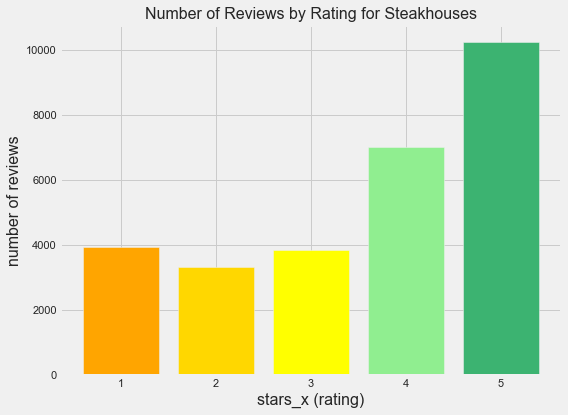

In [109]:
import matplotlib.pyplot as plt
star_x = data.stars_x.value_counts().index
num_star = data.stars_x.value_counts().values
plt.figure(figsize=(8,6))
bar_colors = ['mediumseagreen', 'lightgreen', 'orange', 'yellow', 'gold']
plt.bar(star_x, num_star, color=bar_colors, width=0.8)
plt.xlabel('stars_x (rating)', fontsize=16)
plt.ylabel('number of reviews', fontsize=16)
plt.title('Number of Reviews by Rating for Steakhouses',fontsize=16);

**Let's take a look at how many reviews are there for each rating level.**

In [110]:
review_steakhouse = review[review.business_id.isin(data.business_id)]
review_steakhouse.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
188,wqwgRouFIAi29XGhSiZoDg,m5ID0Dpz6IxbNPmhgZQyEQ,lpxj6LFir23Ds6swW8a6fg,4,0,0,0,Very fresh food and authentic Italian taste. T...,2014-08-10 20:30:28
219,7vsixeZiFsfGoI7JxTpqLg,URig1W1Y_6P2viLKDx5hkQ,d6VYQbeTZ_WdD8Uuhh35dg,5,0,0,1,This is my favorite happy hour place in all of...,2016-11-09 21:15:28
262,0wceCr75fE63DVC-BxJucQ,jV2JRJT9oSEVzoSkOSqmiQ,szGbmw_vq3kVU4SfK1x6Sw,4,1,0,0,Ruth Chris Steakhouse is by far one of the bes...,2015-01-03 23:44:23
273,NHDY0NUgqJrZcGBr2UT4fw,Yvs8q8tth9J5-7Pdxkaq6w,eF2jf-E5ktRQIh_4_-Jxsg,4,1,0,0,My rating is purely on the food and not on the...,2018-07-17 00:58:56
393,EEJXr9Huy4_xasYydJTjng,kdBn3eSDHkHod1Sl7z_MXw,JhxI7oS_jsFnq34dDubugQ,2,1,0,0,Rocky River location. Out of four different en...,2013-01-27 21:07:01


**Save the review_steakhouse**

In [111]:
data.to_csv('review_steakhouse.csv')

**Then let's take a look at the length of the reviews.**

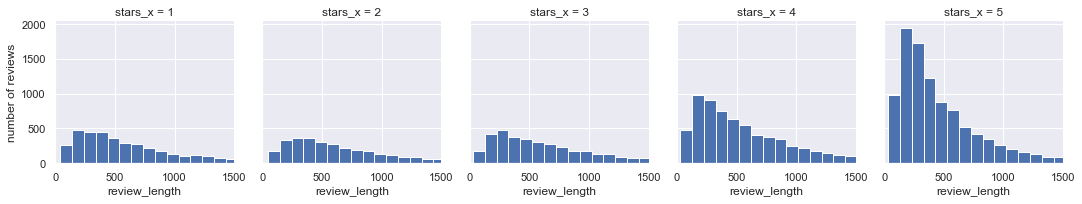

In [112]:
import seaborn as sns
sns.set()
data['review_length'] = data.text.map(len)
multihist = sns.FacetGrid(data=data, col='stars_x',xlim=(0, 1500)).map(plt.hist, 'review_length', bins=50)
multihist.axes[0][0].set(ylabel='number of reviews');

## 3. Choose the topics

In [113]:
import nltk
from nltk.corpus import stopwords
import collections
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /Users/ichi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [123]:
extra = ['ve', 'like', 'got', 'just', 'us','great','get','even',
               'good','best','nice','always','back','ever',
               'ive','go','well','not','bad','terrible','didnt',
               'don', 'really', 'said', 'told', 'ok','dont',
               'came', 'went', 'did', 'didn','one','would']
stop_words=list(set().union(stop_words,extra))

In [124]:
badreviews = data[(data.stars_x <= 2 )]
goodreviews = data[(data.stars_x >= 4)]
badreviews = badreviews.text
goodreviews = goodreviews.text
print('Postive Reviews:  {:,}'.format(len(goodreviews)))
print('Negative Reviews:  {:,}'.format(len(badreviews)))

Postive Reviews:  17,270
Negative Reviews:  7,284


**clean the review text**

In [125]:
import re, string
badreviews = ["".join([char for char in a if char not in string.punctuation]) for a in badreviews]
goodreviews = ["".join([char for char in a if char not in string.punctuation]) for a in goodreviews]

In [126]:
nltk.download('punkt')
nltk.download('wordnet')
from nltk import word_tokenize,sent_tokenize

[nltk_data] Downloading package punkt to /Users/ichi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/ichi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [127]:
text1=badreviews
text1 = [a.lower() for a in text1]
words1 = [nltk.word_tokenize(a) for a in text1]
filtered_words1 = [[word for word in a if word not in stop_words] for a in words1]
from nltk.stem.wordnet import WordNetLemmatizer
lmtzr = WordNetLemmatizer()

In [128]:
text2=goodreviews
text2 = [a.lower() for a in text2]
words2 = [nltk.word_tokenize(a) for a in text2]
filtered_words2 = [[word for word in a if word not in stop_words] for a in words2]

In [129]:
lemmatized_words1 = [[lmtzr.lemmatize(x) for x in a] for a in filtered_words1]
lemmatized_words2 = [[lmtzr.lemmatize(x) for x in a] for a in filtered_words2]

**Let's use LSA to determine the number of top topics and topics we plan to do further analysis with.**

**Firstly, we have to use tfdif algorithm to get the top valuous words in bad/good reviews.**

In [130]:
type(lemmatized_words1)

list

In [131]:
badreviews[0]

'Rocky River location Out of four different entrees ordered at our table only 1 grilled salmon was ok A prime rib filet and the beef tips were poor margarine not butter  Dressing tasted bottled For the price I expected a better dinner  Longhorn or Outback blow this place away at a cheaper price  For the same money you can go to Chez Francois in Vermilion and actually get what you are paying for  Will not be back'

In [132]:
lemmatized_words1[0]

['rocky',
 'river',
 'location',
 'four',
 'different',
 'entree',
 'ordered',
 'table',
 '1',
 'grilled',
 'salmon',
 'prime',
 'rib',
 'filet',
 'beef',
 'tip',
 'poor',
 'margarine',
 'butter',
 'dressing',
 'tasted',
 'bottled',
 'price',
 'expected',
 'better',
 'dinner',
 'longhorn',
 'outback',
 'blow',
 'place',
 'away',
 'cheaper',
 'price',
 'money',
 'chez',
 'francois',
 'vermilion',
 'actually',
 'get',
 'paying']

In [133]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
lemmatized_words1=[ ' '.join(map(str, sent)) for sent in lemmatized_words1]
lemmatized_words2=[ ' '.join(map(str, sent)) for sent in lemmatized_words2]

In [134]:
from array import array

In [135]:
tfidf_model1 = TfidfVectorizer(stop_words=stop_words,
                        ngram_range=(1,1))
tfidf_model2 = TfidfVectorizer(stop_words=stop_words, 
                        ngram_range=(1,1))
result1=tfidf_model1.fit_transform(lemmatized_words1)
result2=tfidf_model2.fit_transform(lemmatized_words2)

In [136]:
print(result1)

  (0, 13217)	0.14611135836782138
  (0, 8138)	0.07203381139354863
  (0, 1261)	0.12409416145098609
  (0, 19552)	0.28323726135977073
  (0, 7797)	0.27397260542499635
  (0, 3995)	0.27397260542499635
  (0, 11790)	0.11212814466408651
  (0, 3907)	0.19531805193416496
  (0, 2217)	0.1123936407699699
  (0, 13537)	0.06724614512177121
  (0, 2891)	0.21764050701562707
  (0, 12786)	0.14198239881534677
  (0, 10834)	0.16666064111671977
  (0, 5745)	0.08785641503155399
  (0, 2677)	0.08909959441047127
  (0, 6970)	0.13966267268934435
  (0, 14002)	0.19434176916132626
  (0, 3019)	0.2255345520501588
  (0, 18025)	0.11564485274309338
  (0, 6193)	0.14252139876520178
  (0, 3423)	0.13646915420217487
  (0, 11144)	0.2609148062783086
  (0, 13726)	0.12109452746739156
  (0, 18485)	0.137615342624553
  (0, 2547)	0.14880322636939988
  :	:
  (7283, 5308)	0.11963759482905793
  (7283, 12704)	0.06547976979039742
  (7283, 6399)	0.07545517187684535
  (7283, 4866)	0.09219606751374944
  (7283, 7901)	0.10725108794203007
  (7283, 157

In [137]:
bad_df = pd.DataFrame(result1.todense(), columns=[tfidf_model1.get_feature_names()])
good_df = pd.DataFrame(result2.todense(), columns=[tfidf_model2.get_feature_names()])

col_means_bad = {}
for col in bad_df:
    col_means_bad[col] = bad_df[col].mean()
col_means_good = {}
for col in good_df:
    col_means_good[col] = good_df[col].mean()
    
top_words = 10

print('Top words in good reviews:')
print(sorted(col_means_good, key=col_means_good.get, reverse=True)[:top_words])
print('Top words in bad reviews:')
print(sorted(col_means_bad, key=col_means_bad.get, reverse=True)[:top_words])

Top words in good reviews:
[('food',), ('service',), ('place',), ('steak',), ('time',), ('restaurant',), ('delicious',), ('bar',), ('amazing',), ('dinner',)]
Top words in bad reviews:
[('food',), ('steak',), ('service',), ('time',), ('place',), ('table',), ('restaurant',), ('ordered',), ('get',), ('minute',)]


**It looks like the most valuable words in both bad and good reviews are 'food', 'place','service','time'. So clearly, what customers care most is the courses (of course steaks for steakhouses), food delivery time and customer services. Now it has given us some intuition, let's do further analysis using LSA.**

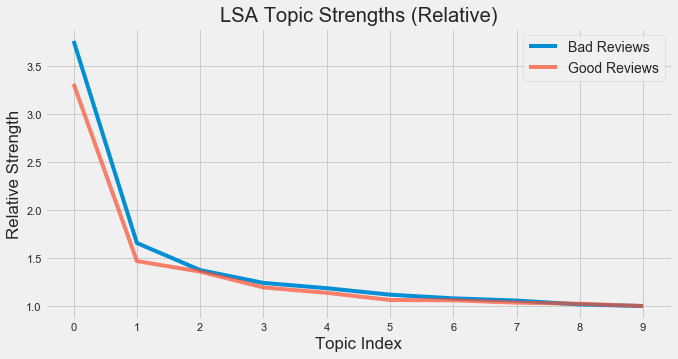

In [138]:
import gensim
from gensim import corpora, models, similarities, matutils
'This part credited to Ankur Vishwakarma, Oakland, CA. https://github.com/Vishwacorp/'
corpus1 = matutils.Sparse2Corpus(result1.transpose())
corpus2 = matutils.Sparse2Corpus(result2.transpose())
word_bad = dict((v,k) for k,v in tfidf_model1.vocabulary_.items())
word_good = dict((v,k) for k,v in tfidf_model2.vocabulary_.items())
word_bad2 = corpora.Dictionary.from_corpus(corpus1, id2word=word_bad)
word_good2 = corpora.Dictionary.from_corpus(corpus2, id2word=word_good)
lsa_bad = models.LsiModel(corpus1, id2word=word_bad2, num_topics=10)
lsa_good = models.LsiModel(corpus2, id2word=word_good2, num_topics=10)

singular_values_bad = lsa_bad.projection.s.tolist()
singular_values_bad_rel = [sv/singular_values_bad[-1] for sv in singular_values_bad]
singular_values_good = lsa_good.projection.s.tolist()
singular_values_good_rel = [sv/singular_values_good[-1] for sv in singular_values_good]
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,5))
plt.plot(range(len(singular_values_bad)), singular_values_bad_rel, label='Bad Reviews', alpha=1.0)
plt.plot(range(len(singular_values_good)), singular_values_good_rel, label='Good Reviews', alpha=0.7)
plt.xticks(range(len(singular_values_bad)), range(len(singular_values_bad)))
plt.xlabel('Topic Index')
plt.ylabel('Relative Strength')
plt.title('LSA Topic Strengths (Relative)')
plt.legend(loc=0, fontsize='medium');

**From the above plot, we can see the it is decent to choose topic number as 5.**

**Let's see roughly what are these topics:**

**Top topics in bad reviews:**

In [140]:
import pprint
from pprint import pprint
print('Top words for bad reviews')
print()
pprint(lsa_bad.show_topics()[0:4])

Top words for bad reviews

[(0,
  '0.207*"food" + 0.186*"steak" + 0.163*"time" + 0.156*"service" + '
  '0.150*"table" + 0.138*"place" + 0.135*"minute" + 0.129*"ordered" + '
  '0.128*"get" + 0.122*"restaurant"'),
 (1,
  '0.480*"steak" + -0.253*"minute" + -0.193*"table" + 0.193*"medium" + '
  '-0.151*"drink" + 0.142*"salad" + 0.142*"rare" + 0.138*"ordered" + '
  '0.132*"cooked" + -0.124*"waited"'),
 (2,
  '-0.370*"steak" + 0.323*"food" + 0.262*"place" + -0.233*"medium" + '
  '-0.233*"minute" + 0.195*"service" + -0.168*"rare" + -0.148*"table" + '
  '-0.137*"ordered" + 0.136*"price"'),
 (3,
  '0.387*"steak" + 0.336*"service" + 0.302*"food" + -0.227*"salad" + '
  '-0.204*"chicken" + -0.172*"cheese" + -0.137*"ordered" + 0.136*"slow" + '
  '0.115*"time" + 0.114*"place"')]


**It can be seen that the tops are likey to be:**

1.Service time of steak; 2.Waiting time between different courses; 3.Temperature of Steak; 4.Sides,salads and other meals of the restaurant.

**Top topics in good reviews:**

In [141]:
print('Top words for bad reviews')
print()
pprint(lsa_good.show_topics()[0:4])

Top words for bad reviews

[(0,
  '0.208*"food" + 0.185*"steak" + 0.179*"place" + 0.172*"service" + '
  '0.146*"time" + 0.126*"restaurant" + 0.115*"bar" + 0.115*"delicious" + '
  '0.111*"dinner" + 0.109*"salad"'),
 (1,
  '-0.361*"curd" + -0.357*"cheese" + -0.296*"burger" + 0.275*"steak" + '
  '-0.260*"old" + -0.250*"beer" + -0.236*"fashioned" + -0.179*"wisconsin" + '
  '-0.171*"madison" + -0.135*"place"'),
 (2,
  '0.471*"food" + 0.308*"service" + 0.201*"atmosphere" + 0.184*"excellent" + '
  '-0.170*"cheese" + -0.153*"salad" + -0.152*"ordered" + -0.145*"steak" + '
  '0.144*"place" + 0.143*"amazing"'),
 (3,
  '0.572*"steak" + -0.229*"bar" + 0.189*"cheese" + 0.176*"curd" + '
  '0.173*"service" + -0.173*"brunch" + -0.163*"meat" + -0.159*"hour" + '
  '-0.156*"happy" + 0.148*"excellent"')]


**It can be discovered that the positive topics are likely to be:**

1.Service of the restaurant; 2.The atomsphere of the restaurant; 3.Sides; 4.Quality of Steak

**Given the results of LSA, we could find out that there exists some negative weights for the extracted topics, which makes it hard for interpretation and could be misleading.**

**Next, we tried NMF for better results.**

In [142]:
from sklearn.decomposition import NMF
num = 4
nmf_bad = NMF(n_components=num)
W_bad = nmf_bad.fit_transform(result1)
H_bad = nmf_bad.components_

nmf_good = NMF(n_components=num)
W_good = nmf_good.fit_transform(result2)
H_good = nmf_good.components_

In [143]:
print(H_good)

[[6.34823417e-04 2.42874775e-04 2.99646702e-04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.29880392e-05 3.77121846e-04 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 7.84094571e-04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [144]:
def print_topics(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic %d: " % topic_idx
        message += " + ".join(['{:04.3f}*'.format(topic[i])+feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()
    
n_top_words = 10

print('Top words in good reviews:')
print()
print_topics(nmf_good, tfidf_model2.get_feature_names(), n_top_words)

Top words in good reviews:

Topic 0: 0.748*salad + 0.738*meat + 0.665*ordered + 0.612*table + 0.597*bar + 0.566*dinner + 0.558*also + 0.558*delicious + 0.552*time + 0.548*meal
Topic 1: 1.393*cheese + 1.244*curd + 1.133*burger + 0.964*old + 0.888*beer + 0.816*fashioned + 0.642*madison + 0.616*wisconsin + 0.492*place + 0.370*sandwich
Topic 2: 1.684*food + 1.198*service + 0.766*place + 0.714*excellent + 0.687*atmosphere + 0.664*amazing + 0.550*staff + 0.528*recommend + 0.490*love + 0.447*restaurant
Topic 3: 2.701*steak + 0.789*cooked + 0.468*perfectly + 0.436*side + 0.390*steakhouse + 0.379*house + 0.358*medium + 0.352*service + 0.344*ribeye + 0.328*rare



**Compared with LSA method, we could give better interpretation based on the results of top words in topics.**

**It can be seen that the tops in good reviews are likey to be:**

(1) meat and salad; (2) good service and atmosphere; (3) sides and snacks ; (4) steak quality. (1) salad and sides and (2) meals other than steak.

In [145]:
print('Top words in bad reviews:')
print()
print_topics(nmf_bad, tfidf_model1.get_feature_names(), n_top_words)

Top words in bad reviews:

Topic 0: 1.065*minute + 1.033*table + 0.717*drink + 0.671*order + 0.543*time + 0.515*server + 0.507*wait + 0.505*waited + 0.494*asked + 0.490*took
Topic 1: 1.953*steak + 0.793*medium + 0.596*rare + 0.427*cooked + 0.399*ordered + 0.344*done + 0.279*filet + 0.249*cook + 0.223*cut + 0.212*steakhouse
Topic 2: 0.749*salad + 0.503*ordered + 0.479*chicken + 0.455*cheese + 0.390*burger + 0.372*fry + 0.353*meat + 0.352*potato + 0.351*sauce + 0.329*side
Topic 3: 1.598*food + 1.177*service + 0.994*place + 0.573*time + 0.422*slow + 0.405*price + 0.382*better + 0.373*restaurant + 0.337*quality + 0.324*get



**It can be seen that the tops in bad reviews are likey to be:**

(1) slow service and drink; (2) temperature of steak (seems like thai food in this subset of data); (3) sides and ingredients; (4) place.

**By now we used LSA and NMF to choose top topics in review text, and from the results, we could make good interpretations. Then we'd like to try LDA.**

**Before using LDA, we need to use CountVectorizer to convert the collection of text documents to a vector of token counts.**

In [146]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
cv_bad = CountVectorizer(stop_words=stop_words, min_df=10, max_df=0.5, 
                        ngram_range=(1,1), token_pattern='[a-z][a-z]+')
cv_good = CountVectorizer(stop_words=stop_words, min_df=10, max_df=0.5, 
                        ngram_range=(1,1), token_pattern='[a-z][a-z]+')

np.random.seed(20)
num_reviews = 5000
cv_random_bad = np.random.choice(badreviews, size=num_reviews)
cv_random_good = np.random.choice(goodreviews, size=num_reviews)
cv_bad_vectors = cv_bad.fit_transform(cv_random_bad).transpose()
cv_good_vectors = cv_good.fit_transform(cv_random_good).transpose()

In [147]:
corpus_bad = matutils.Sparse2Corpus(cv_bad_vectors)
corpus_good = matutils.Sparse2Corpus(cv_good_vectors)
id2word_cv_bad = dict((v, k) for k, v in cv_bad.vocabulary_.items())
id2word_cv_good = dict((v, k) for k, v in cv_good.vocabulary_.items())

In [148]:
lda_bad = models.ldamulticore.LdaMulticore(corpus=corpus_bad, num_topics=4, 
                                           id2word=id2word_cv_bad, passes=10, workers=15)
lda_good = models.ldamulticore.LdaMulticore(corpus=corpus_good, num_topics=4, 
                                           id2word=id2word_cv_good, passes=10, workers=15)

In [149]:
print('Top words for good reviews')
print()
pprint(lda_bad.print_topics(num_words=10))

Top words for good reviews

[(0,
  '0.015*"place" + 0.013*"service" + 0.008*"steak" + 0.008*"get" + '
  '0.007*"restaurant" + 0.007*"better" + 0.006*"ordered" + 0.006*"time" + '
  '0.005*"even" + 0.005*"much"'),
 (1,
  '0.010*"restaurant" + 0.009*"table" + 0.009*"never" + 0.008*"place" + '
  '0.008*"service" + 0.008*"bar" + 0.008*"time" + 0.007*"could" + '
  '0.007*"manager" + 0.007*"get"'),
 (2,
  '0.016*"minutes" + 0.012*"steak" + 0.012*"service" + 0.011*"time" + '
  '0.011*"ordered" + 0.011*"get" + 0.010*"table" + 0.009*"order" + '
  '0.009*"waitress" + 0.009*"took"'),
 (3,
  '0.011*"steak" + 0.010*"ordered" + 0.008*"salad" + 0.007*"restaurant" + '
  '0.006*"didnt" + 0.006*"menu" + 0.006*"bar" + 0.006*"service" + '
  '0.006*"cheese" + 0.005*"server"')]


In [150]:
print('Top words for bad reviews')
print()
pprint(lda_bad.print_topics(num_words=10))

Top words for bad reviews

[(0,
  '0.015*"place" + 0.013*"service" + 0.008*"steak" + 0.008*"get" + '
  '0.007*"restaurant" + 0.007*"better" + 0.006*"ordered" + 0.006*"time" + '
  '0.005*"even" + 0.005*"much"'),
 (1,
  '0.010*"restaurant" + 0.009*"table" + 0.009*"never" + 0.008*"place" + '
  '0.008*"service" + 0.008*"bar" + 0.008*"time" + 0.007*"could" + '
  '0.007*"manager" + 0.007*"get"'),
 (2,
  '0.016*"minutes" + 0.012*"steak" + 0.012*"service" + 0.011*"time" + '
  '0.011*"ordered" + 0.011*"get" + 0.010*"table" + 0.009*"order" + '
  '0.009*"waitress" + 0.009*"took"'),
 (3,
  '0.011*"steak" + 0.010*"ordered" + 0.008*"salad" + 0.007*"restaurant" + '
  '0.006*"didnt" + 0.006*"menu" + 0.006*"bar" + 0.006*"service" + '
  '0.006*"cheese" + 0.005*"server"')]


**Compared with LSA method, we could give better interpretation based on the results of top words in topics.**

**It can be seen that the tops in good reviews are likey to be:**

(1) meat and salad; (2) good service and atmosphere; (3) sides and snacks ; (4) steak quality. (1) salad and sides and (2) meals other than steak.

**It can be seen that the tops in bad reviews are likey to be:**

(1) slow service and drink; (2) temperature of steak (seems like thai food in this subset of data); (3) sides and ingredients; (4) place.

**Seen from the results of LDA, the topics are .**